In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import skimage
from scipy.ndimage.measurements import histogram
from skimage.filters.rank import entropy
from sklearn.cluster import KMeans
from scipy import ndimage
import impavi 

# Image Segmentation techniques ( 2/3 )

The second image I will work with is similar to the first one. This part of the study will provide a new way of obtaining features that can easily differentiate the two regions (cut and tissue). As you can see in the image below, **segmentation can not be performed based on color** so I will have to find other properties that vary between regions. 

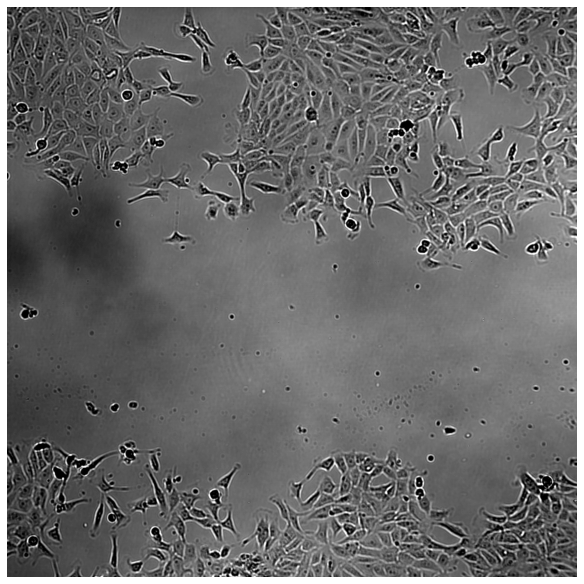

In [2]:
impavi.show('DIC_SN_15_L7_Sum00.tif')

## State of the Art algorithms results

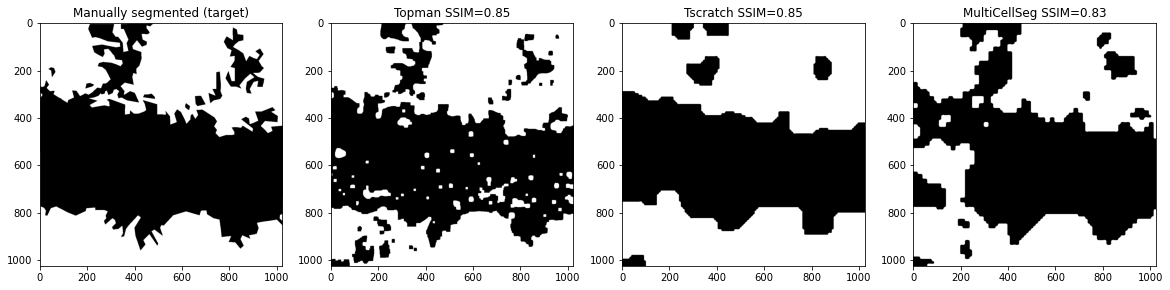

In [3]:
impavi.state_of_the_art('DIC_SN_15_L7_Sum00')

Once again, equalizing the image improves contrast and texture in saturated regions

In [4]:
im = plt.imread('DIC_SN_15_L7_Sum00.tif')
im_eq = impavi.equalize(im,plot=False)

# Edge enhancement approach 
## KIRSCH COMPASS KERNEL

I decided to apply this a technique which will exploit the edges of the tissue (and the absence of edges of the cut). This algorithm published in by *Kirsch, R. (1971)* in "*Computer determination of the constituent structure of biological images*" will give a very useful result for applying the median filter.

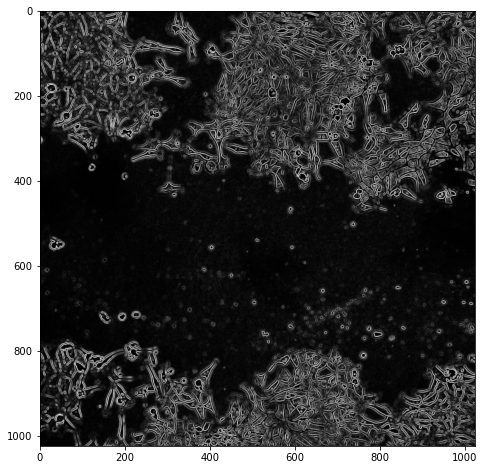

In [17]:
# I built the "impavi" module with fully documented functions with explanations and comments
im_kirsch = impavi.kirsch_compass_kernel(im_eq)
plt.figure(figsize=(8,8))
plt.imshow(im_kirsch,cmap='gray')

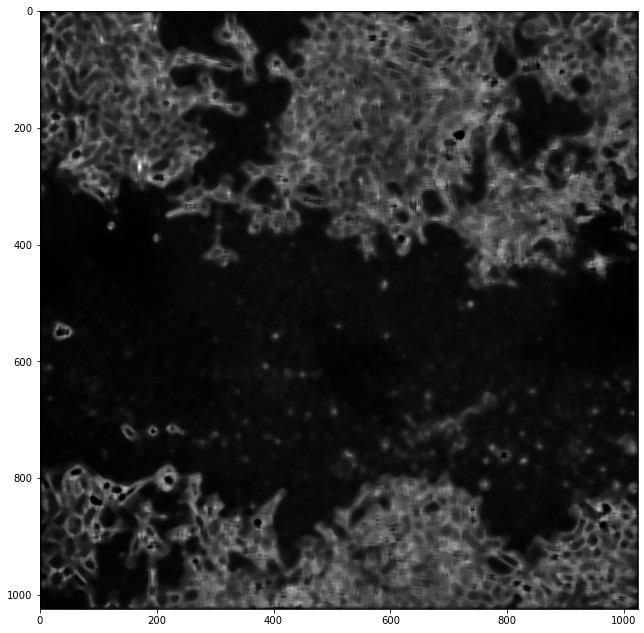

In [18]:
media = scipy.signal.medfilt2d(im_kirsch, kernel_size=11)
plt.figure(figsize=(11,11))
plt.imshow(media,cmap='gray')

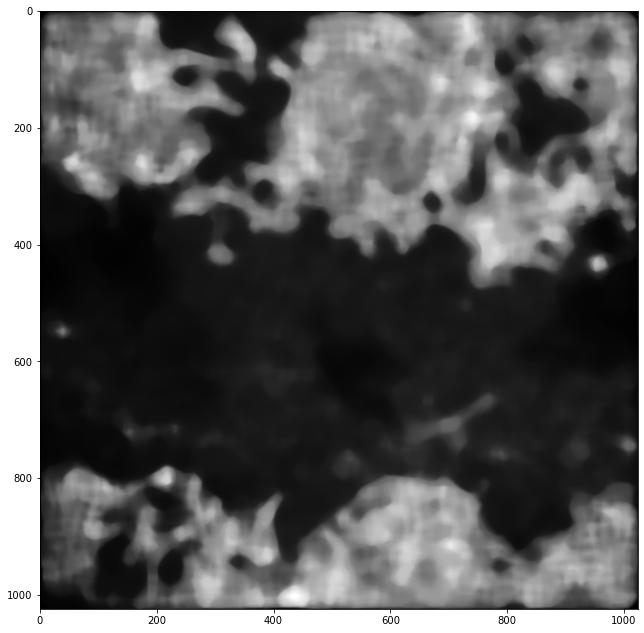

In [20]:
media2 = scipy.signal.medfilt2d(media, kernel_size=[31,31])
plt.figure(figsize=(11,11))
plt.imshow(media2,cmap='gray')

In this case you **must not** apply a low-pass filter. I binarize the image directly, otherwise, I would lose all the detailed I managed to preserve during the median filters application. In this case, the detailes plays a very important role since the cells form complex patterns.

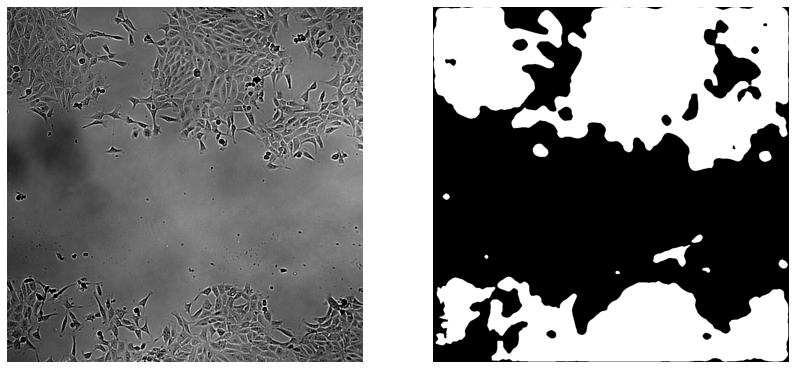

In [70]:
final = media2>skimage.filters.threshold_otsu(media2)*0.75
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.axis('off')
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.imshow(final,cmap='gray')

In [65]:
target = plt.imread('DIC_SN_15_L7_Sum00_manual.png')
ssim = skimage.metrics.structural_similarity(target,final)
print('The SSIM between the target and my result is:',ssim)

The SSIM between the target and my result is: 0.8657424291360187


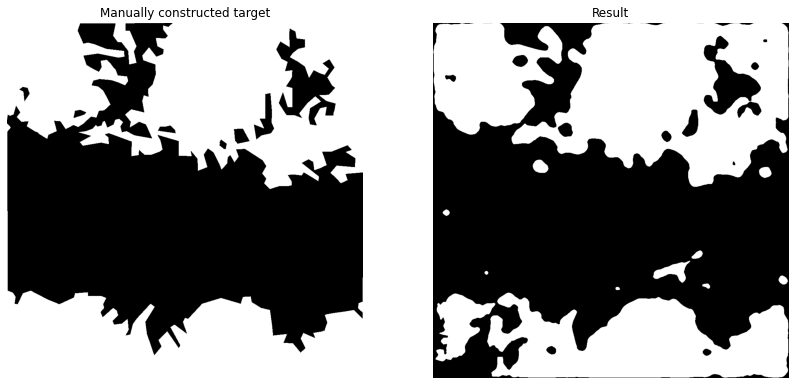

In [72]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.axis('off')
plt.title('Manually constructed target')
plt.imshow(target,cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('Result')
plt.imshow(final,cmap='gray')